# Assignment # 4: Model Development (Data Analysis)

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 
%matplotlib inline

In [65]:
df = pd.read_csv( "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv", header = 0)

In [66]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


# Task 1 : Single Linear Regression
You have learnt that "CPU_frequency" is the parameter with the lowest p-value among the different features of the dataset. Create a single feature Linear Regression model that fits the pair of "CPU_frequency" and "Price" to find the model for prediction.

In [118]:
lm = LinearRegression()
lm
X = df[["CPU_frequency"]]
Y = df["Price"]

In [68]:
lm.fit(X,Y)

LinearRegression()

In [69]:
yhat = lm.predict(X) # Y hat (written ŷ ) is the predicted value of y (the dependent variable)
                    #in a regression equation. It can also be considered to be the average value of the response variable.

Generate the Distribution plot for the predicted values and that of the actual values. How well did the model perform?

E:\anacond\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\anacond\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\anacond\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\anacond\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


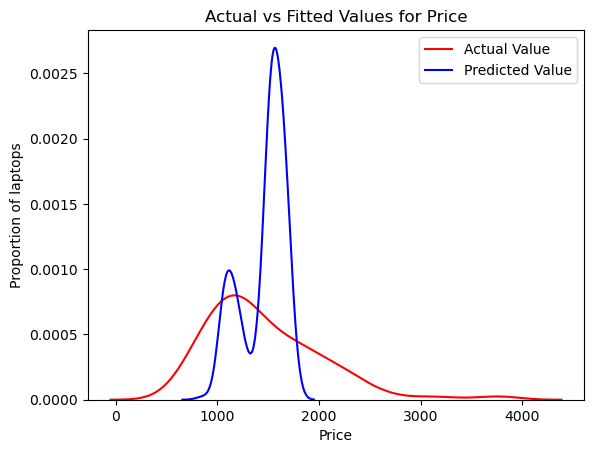

In [70]:
ax1 = sns.distplot(df['Price'], hist=False, color="r", label="Actual Value")

# Create a distribution plot for predicted values
sns.distplot(yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')
plt.legend(['Actual Value', 'Predicted Value'])
plt.show()

Evaluate the Mean Squared Error and R^2 score values for the model.

In [71]:
# Mean Squared Error (MSE)
MSE_Error = mean_squared_error(df["Price"],yhat) # Beacuse MSE is the difference between actual avalyue and the predicted value
# Means it show how close the predicted value(yhat) is to the actual value.

#R^2 Values
R_2 = lm.score(X,Y)

print("The MSE Error is :", MSE_Error)
print("The R square value is :", R_2)

The MSE Error is : 284583.4405868629
The R square value is : 0.1344436321024326


# Task 2 - Multiple Linear Regression

The parameters which have a low enough p-value so as to indicate strong relationship with the 'Price' value are 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU' and 'Category'. Use all these variables to create a Multiple Linear Regression system.

In [72]:
lm1 = LinearRegression()
Z = df[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU','Category']]
lm1.fit(Z,Y)
y_hat = lm1.predict(Z)

Plot the Distribution graph of the predicted values as well as the Actual values

E:\anacond\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\anacond\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\anacond\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\anacond\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


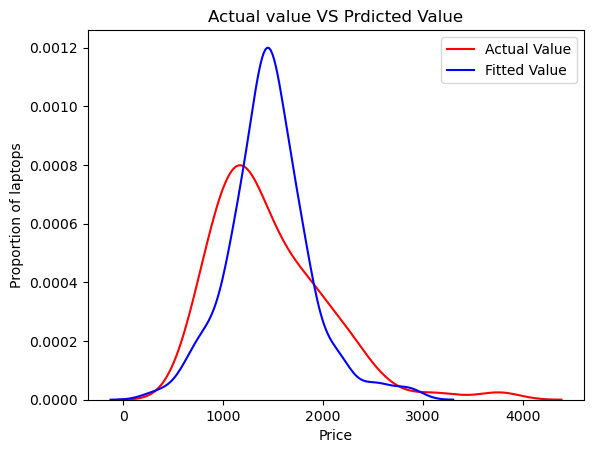

In [73]:
ax2 = sns.distplot(df["Price"], hist = False, color = "r", label = "Actual Value")
sns.distplot(y_hat, hist = False, color = "b", label = "Preicted Value")
plt.xlabel("Price")
plt.ylabel("Proportion of laptops")
plt.title("Actual value VS Prdicted Value")
plt.legend(['Actual Value', 'Fitted Value'])

Find the R^2 score and the MSE value for this fit. Is this better or worst than the performance of Single Linear Regression?

In [74]:
lm.fit(Z,Y)
RR= lm.score(Z,Y)
print("R square value is :",RR)
MSE = mean_squared_error(df["Price"],y_hat)
print("The MSE Error is :",MSE)

R square value is : 0.5082509055187374
The MSE Error is : 161680.57263893107


# Task 3 - Polynomial Regression

Use the variable "CPU_frequency" to create Polynomial features. Try this for 3 different values of polynomial degrees. Remember that polynomial fits are done using numpy.polyfit.

In [85]:
# to_numpy() converts df to aray. Flatten() method in Python is used to return a copy of a given array in such a way that it is collapsed into one dimension.
# to convert 2d array to 1d array
X = X.flatten()  # Flatten X if it's 2-dimensional (i have removed to_numpy()) because it is done once.

# Correctly call np.polyfit with X, Y, and degree arguments:
f1 = np.polyfit(X, Y, 1)  # Fit a linear polynomial (degree 1)
p1 = np.poly1d(f1)  # Create a polynomial object for later use

f3 = np.polyfit(X, Y, 3)  # Fit a cubic polynomial (degree 3)
p3 = np.poly1d(f3)

f5 = np.polyfit(X, Y, 5)  # Fit a quintic polynomial (degree 5)
p5 = np.poly1d(f5)

Plot the regression output against the actual data points to note how the data fits in each case. To plot the polynomial response over the actual data points, you have the function shown below.

In [86]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(independent_variable.min(),independent_variable.max(),100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title(f'Polynomial Fit for Price ~ {Name}')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of laptops')

Call this function for the 3 models created and get the required graphs.

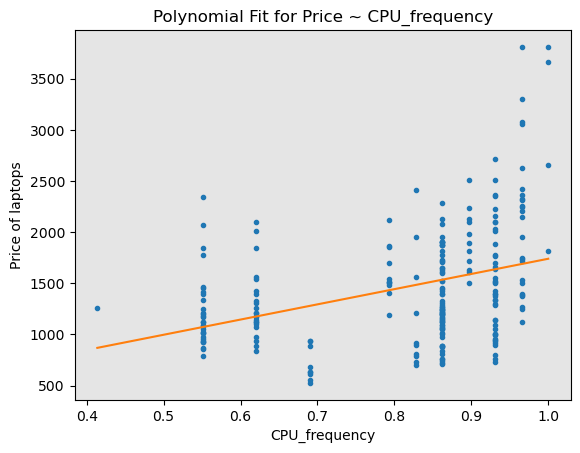

In [87]:
PlotPolly(p1,X,Y,'CPU_frequency') # For Linear Polynomial

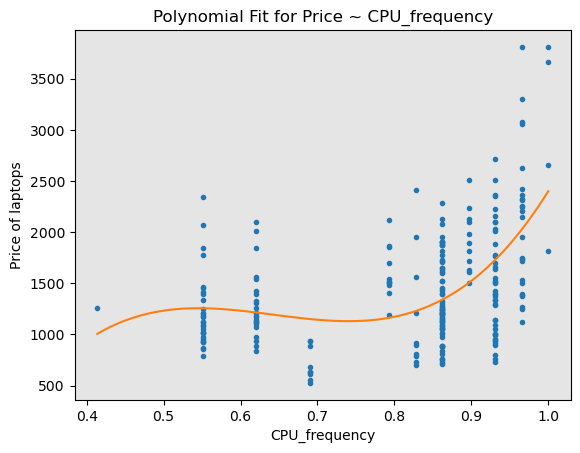

In [88]:
PlotPolly(p3,X,Y,'CPU_frequency') # For Cubic Polynomial

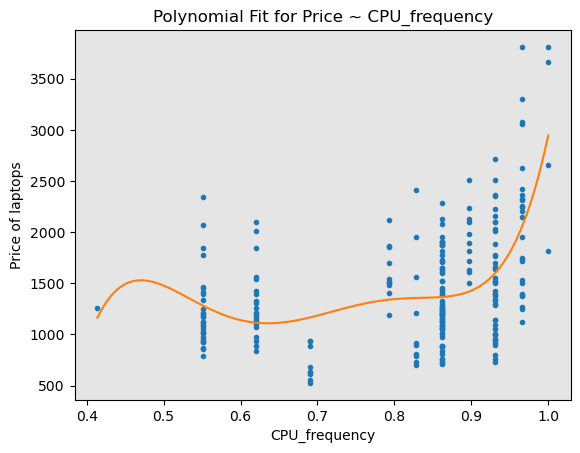

In [89]:
PlotPolly(p5,X,Y,'CPU_frequency') # For Quintic Polynomial

Also, calculate the R^2 and MSE values for these fits. For polynomial functions, the function sklearn.metrics.r2_score will be used to calculate R^2 values.

In [97]:
R_Sq = r2_score(Y,p1(X))
print("The R square value for 1st degree polynomial is :", R_Sq)
print("The MSE value for 1st degree polynomial is", mean_squared_error(Y, p1(X))) 

The R square value for 1st degree polynomial is : 0.1344436321024326
The MSE value for 1st degree polynomial is 284583.4405868629


In [100]:
R_sq = r2_score(Y,p3(X))
print("The R square valuse for 3rd degree polynomial is :", R_sq)
print("The MSE value for 3rd degree polynomial is", mean_squared_error(Y, p3(X))) 

The R square valuse for 3rd degree polynomial is : 0.26692640796531053
The MSE value for 3rd degree polynomial is 241024.86303848788


In [102]:
r_Sq = r2_score(Y,p5(X))
print("The R square valuse for 3rd degree polynomial is :", r_Sq)
print("The MSE value for 5 degree polynomial is", mean_squared_error(Y, p5(X)))

The R square valuse for 3rd degree polynomial is : 0.3030822706442695
The MSE value for 5 degree polynomial is 229137.29548057468


# Task 4 - Pipeline
Create a pipeline that performs parameter scaling, Polynomial Feature generation and Linear regression. Use the set of multiple features as before to create this pipeline.

In [139]:
# dont use "input" ita a command.i.e "i" should be small
Input = [("Scale", StandardScaler()),("Polynomial", PolynomialFeatures(include_bias = False)), ("Model", LinearRegression())]
pipe = Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,Y)
ypipe = pipe.predict(Z)


Evaluate the MSE and R^2 values for the this predicted output.

In [140]:
print("The MSE value is :", mean_squared_error(Y,ypipe))
print("The R square valu is:", r2_score(Y,ypipe))

The MSE value is : 123299.09033613445
The R square valu is: 0.624987621991154
